In [2]:
import pandas as pd
from polygon import RESTClient

In [3]:
# Grab Polygon API key
with open("../../config/.polygon_key") as f:
    api_key = f.readline().strip()
client = RESTClient(api_key=f"{api_key}")

# nq500_ticker.csv
Grabs ticker information on all tickers in S&P500.

In [8]:
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/Nasdaq-100#Components')[4]
print(tickers.head())

                   Company Symbol             GICS Sector  \
0               Adobe Inc.   ADBE  Information Technology   
1   Advanced Micro Devices    AMD  Information Technology   
2                   Airbnb   ABNB  Consumer Discretionary   
3  Alphabet Inc. (Class A)  GOOGL  Communication Services   
4  Alphabet Inc. (Class C)   GOOG  Communication Services   

                GICS Sub-Industry  
0            Application Software  
1                  Semiconductors  
2  Hotels, Resorts & Cruise Lines  
3    Interactive Media & Services  
4    Interactive Media & Services  


In [9]:
tickers.to_csv('../nq100_ticker.csv')

# nq500_close.csv
Close prices for sp500 stocks

In [10]:
# Get the historical data for all S&P 500 tickers using Polygon
import time

# df = pd.DataFrame(columns=tickers['Symbol'])
df = {}

In [11]:

i = 0
for ticker in tickers['Symbol']:
    print(ticker, i)
    resp = client.list_aggs(
        ticker, 1, 'day', '2022-01-01', '2024-01-01')
    data = [data for data in resp]
    df[ticker] = [d.close for d in data]
    time.sleep(12.01)
    i += 1



ADBE 0
AMD 1
ABNB 2
GOOGL 3
GOOG 4
AMZN 5
AEP 6
AMGN 7
ADI 8
ANSS 9
AAPL 10
AMAT 11
ARM 12
ASML 13
AZN 14
TEAM 15
ADSK 16
ADP 17
BKR 18
BIIB 19
BKNG 20
AVGO 21
CDNS 22
CDW 23
CHTR 24
CTAS 25
CSCO 26
CCEP 27
CTSH 28
CMCSA 29
CEG 30
CPRT 31
CSGP 32
COST 33
CRWD 34
CSX 35
DDOG 36
DXCM 37
FANG 38
DLTR 39
DASH 40
EA 41
EXC 42
FAST 43
FTNT 44
GEHC 45
GILD 46
GFS 47
HON 48
IDXX 49
ILMN 50
INTC 51
INTU 52
ISRG 53
KDP 54
KLAC 55
KHC 56
LRCX 57
LIN 58
LULU 59
MAR 60
MRVL 61
MELI 62
META 63
MCHP 64
MU 65
MSFT 66
MRNA 67
MDLZ 68
MDB 69
MNST 70
NFLX 71
NVDA 72
NXPI 73
ORLY 74
ODFL 75
ON 76
PCAR 77
PANW 78
PAYX 79
PYPL 80
PDD 81
PEP 82
QCOM 83
REGN 84
ROP 85
ROST 86
SBUX 87
SMCI 88
SNPS 89
TTWO 90
TMUS 91
TSLA 92
TXN 93
TTD 94
VRSK 95
VRTX 96
WBD 97
WDAY 98
XEL 99
ZS 100


In [12]:
df['Date'] = [d.timestamp for d in data]
df['Date'] = pd.to_datetime(df['Date'], unit='ms')

In [13]:
# Remove stocks that don't have full data
# disregard = set(["AMTHM", "BIIB", "COR", "CPAY", "DAY", "EG", "FI", "GEHC", "GFEV", "GEN", "KVUE", "RVTY", "SW", "SOLV", "VLTO"])
regard = set([k for k, v in df.items() if len(v) == 293])
pd.DataFrame({k: v for k, v in df.items() if k in regard}).to_csv("../nq100_close.csv")

In [15]:
# Make the csv prettier
dff = pd.read_csv("../nq100_close.csv")

# Sort dff by column alphabetically
dff = dff.reindex(sorted(dff.columns), axis=1)

# Make date index column
dff['Date'] = pd.to_datetime(dff['Date'])
dff.set_index('Date', inplace=True)

dff

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,Unnamed: 0,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31 04:00:00,153.34,106.91,318.50,142.62,241.70,214.30,87.92,88.29,60.06,270.35,...,53.24,118.48,160.63,0,182.83,312.00,13.00,155.82,65.11,154.10
2022-11-01 04:00:00,150.65,109.05,316.02,144.70,243.64,214.05,88.53,89.79,59.66,272.06,...,53.08,116.31,162.90,1,181.47,314.20,13.35,151.60,65.90,150.39
2022-11-02 04:00:00,145.03,94.41,301.22,141.24,237.44,199.38,88.21,87.76,58.63,269.01,...,49.50,113.55,158.49,2,169.33,310.01,12.68,143.51,65.31,138.09
2022-11-03 04:00:00,138.88,92.02,285.93,138.02,236.10,194.22,88.68,86.30,60.11,265.88,...,49.17,111.30,156.52,3,165.37,311.30,11.97,140.22,65.15,131.07
2022-11-04 04:00:00,138.38,96.09,285.75,144.29,236.86,193.69,89.57,91.70,62.19,269.04,...,46.25,108.53,162.65,4,166.52,308.82,10.43,132.63,65.55,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 05:00:00,193.60,140.80,598.75,197.10,230.97,242.76,80.38,162.05,139.60,284.16,...,73.43,161.95,168.24,288,236.20,405.25,11.27,272.57,62.06,221.68
2023-12-26 05:00:00,193.05,138.72,598.26,198.87,232.54,245.07,80.73,164.28,143.41,283.90,...,73.59,161.62,170.81,289,237.03,407.66,11.50,273.97,62.25,224.59
2023-12-27 05:00:00,193.15,136.55,596.08,199.35,231.61,245.11,80.81,164.21,146.07,286.53,...,74.08,160.99,171.23,290,237.22,408.05,11.49,273.70,61.54,225.02


In [16]:
dff.to_csv("../nq100_close.csv")

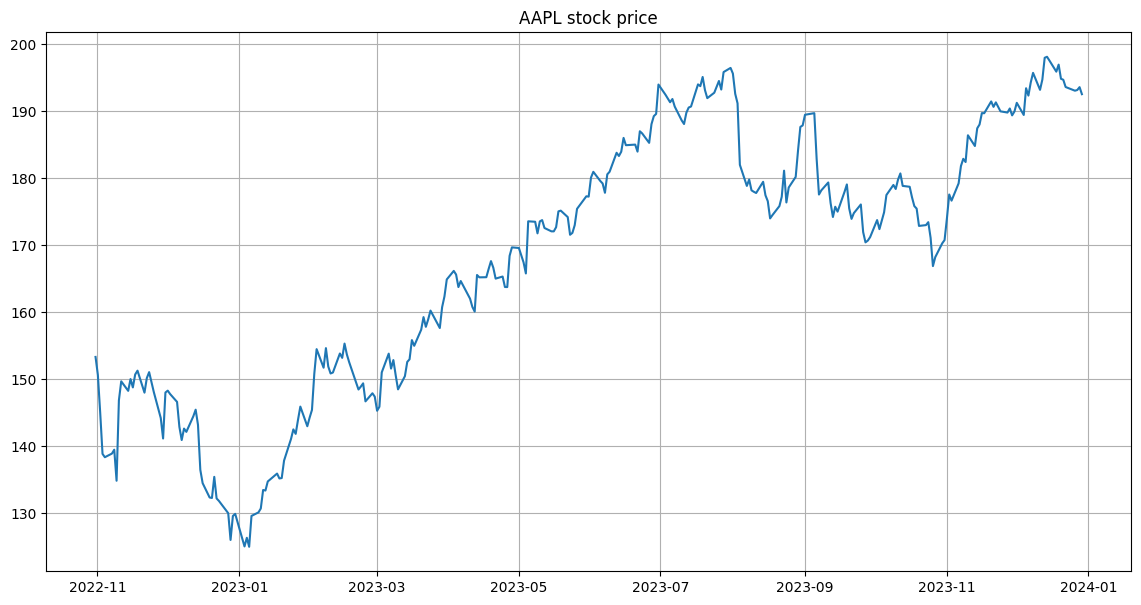

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(dff['AAPL'])
plt.title('AAPL stock price')
plt.grid()